In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
# Load dataset
df = pd.read_csv('music_dataset.csv')

In [19]:
# Meta Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [20]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [23]:
# Removes all missing values
df = df.dropna()
print(df.isnull().sum())  # Should show all zeros

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


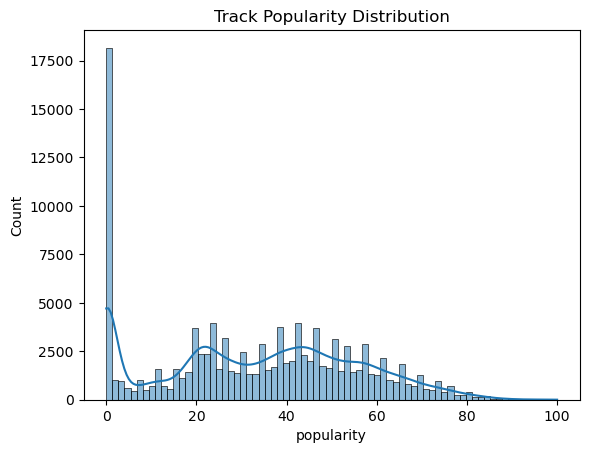

In [7]:
# Distribution of target variable
df.drop('Unnamed: 0', axis=1, inplace=True) #  Drop the column 'Unnamed'
sns.histplot(df['popularity'], kde=True)
plt.title('Track Popularity Distribution')
plt.show()

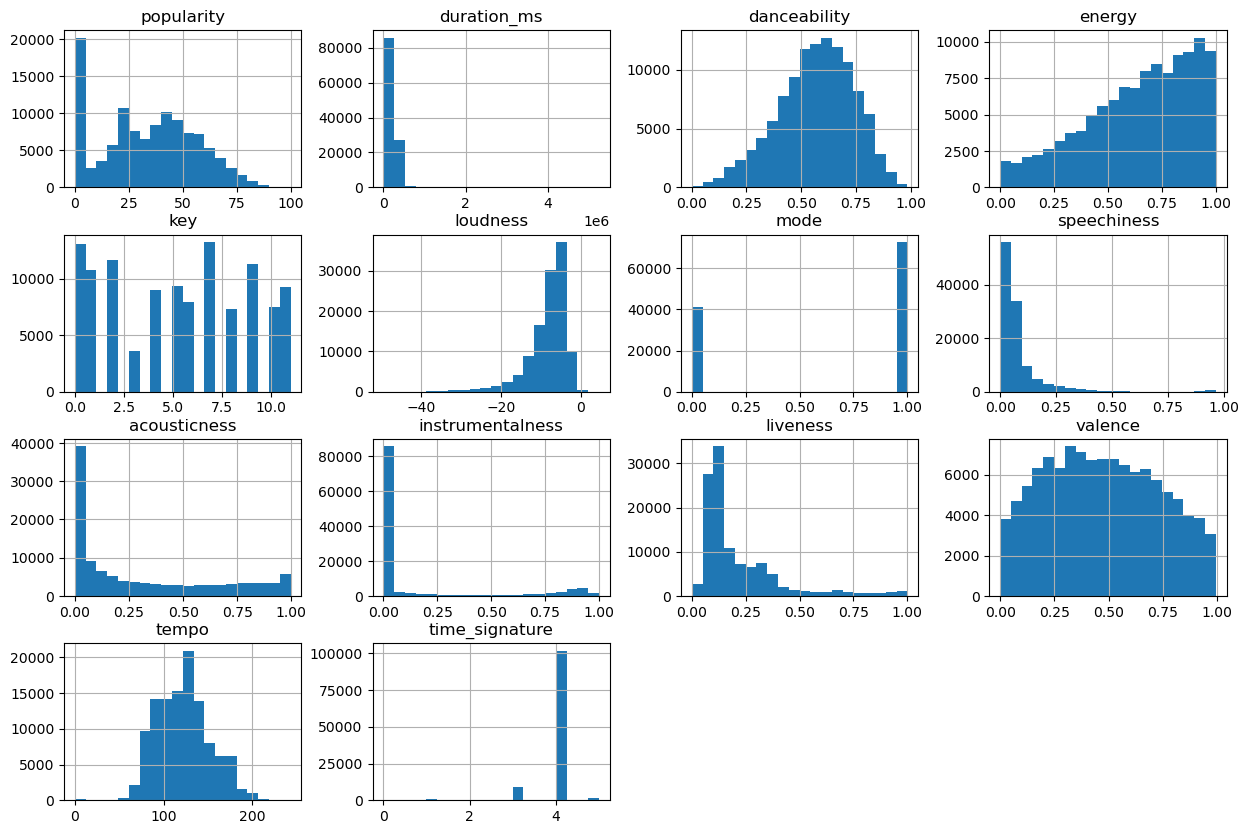

In [8]:
# Visualize numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

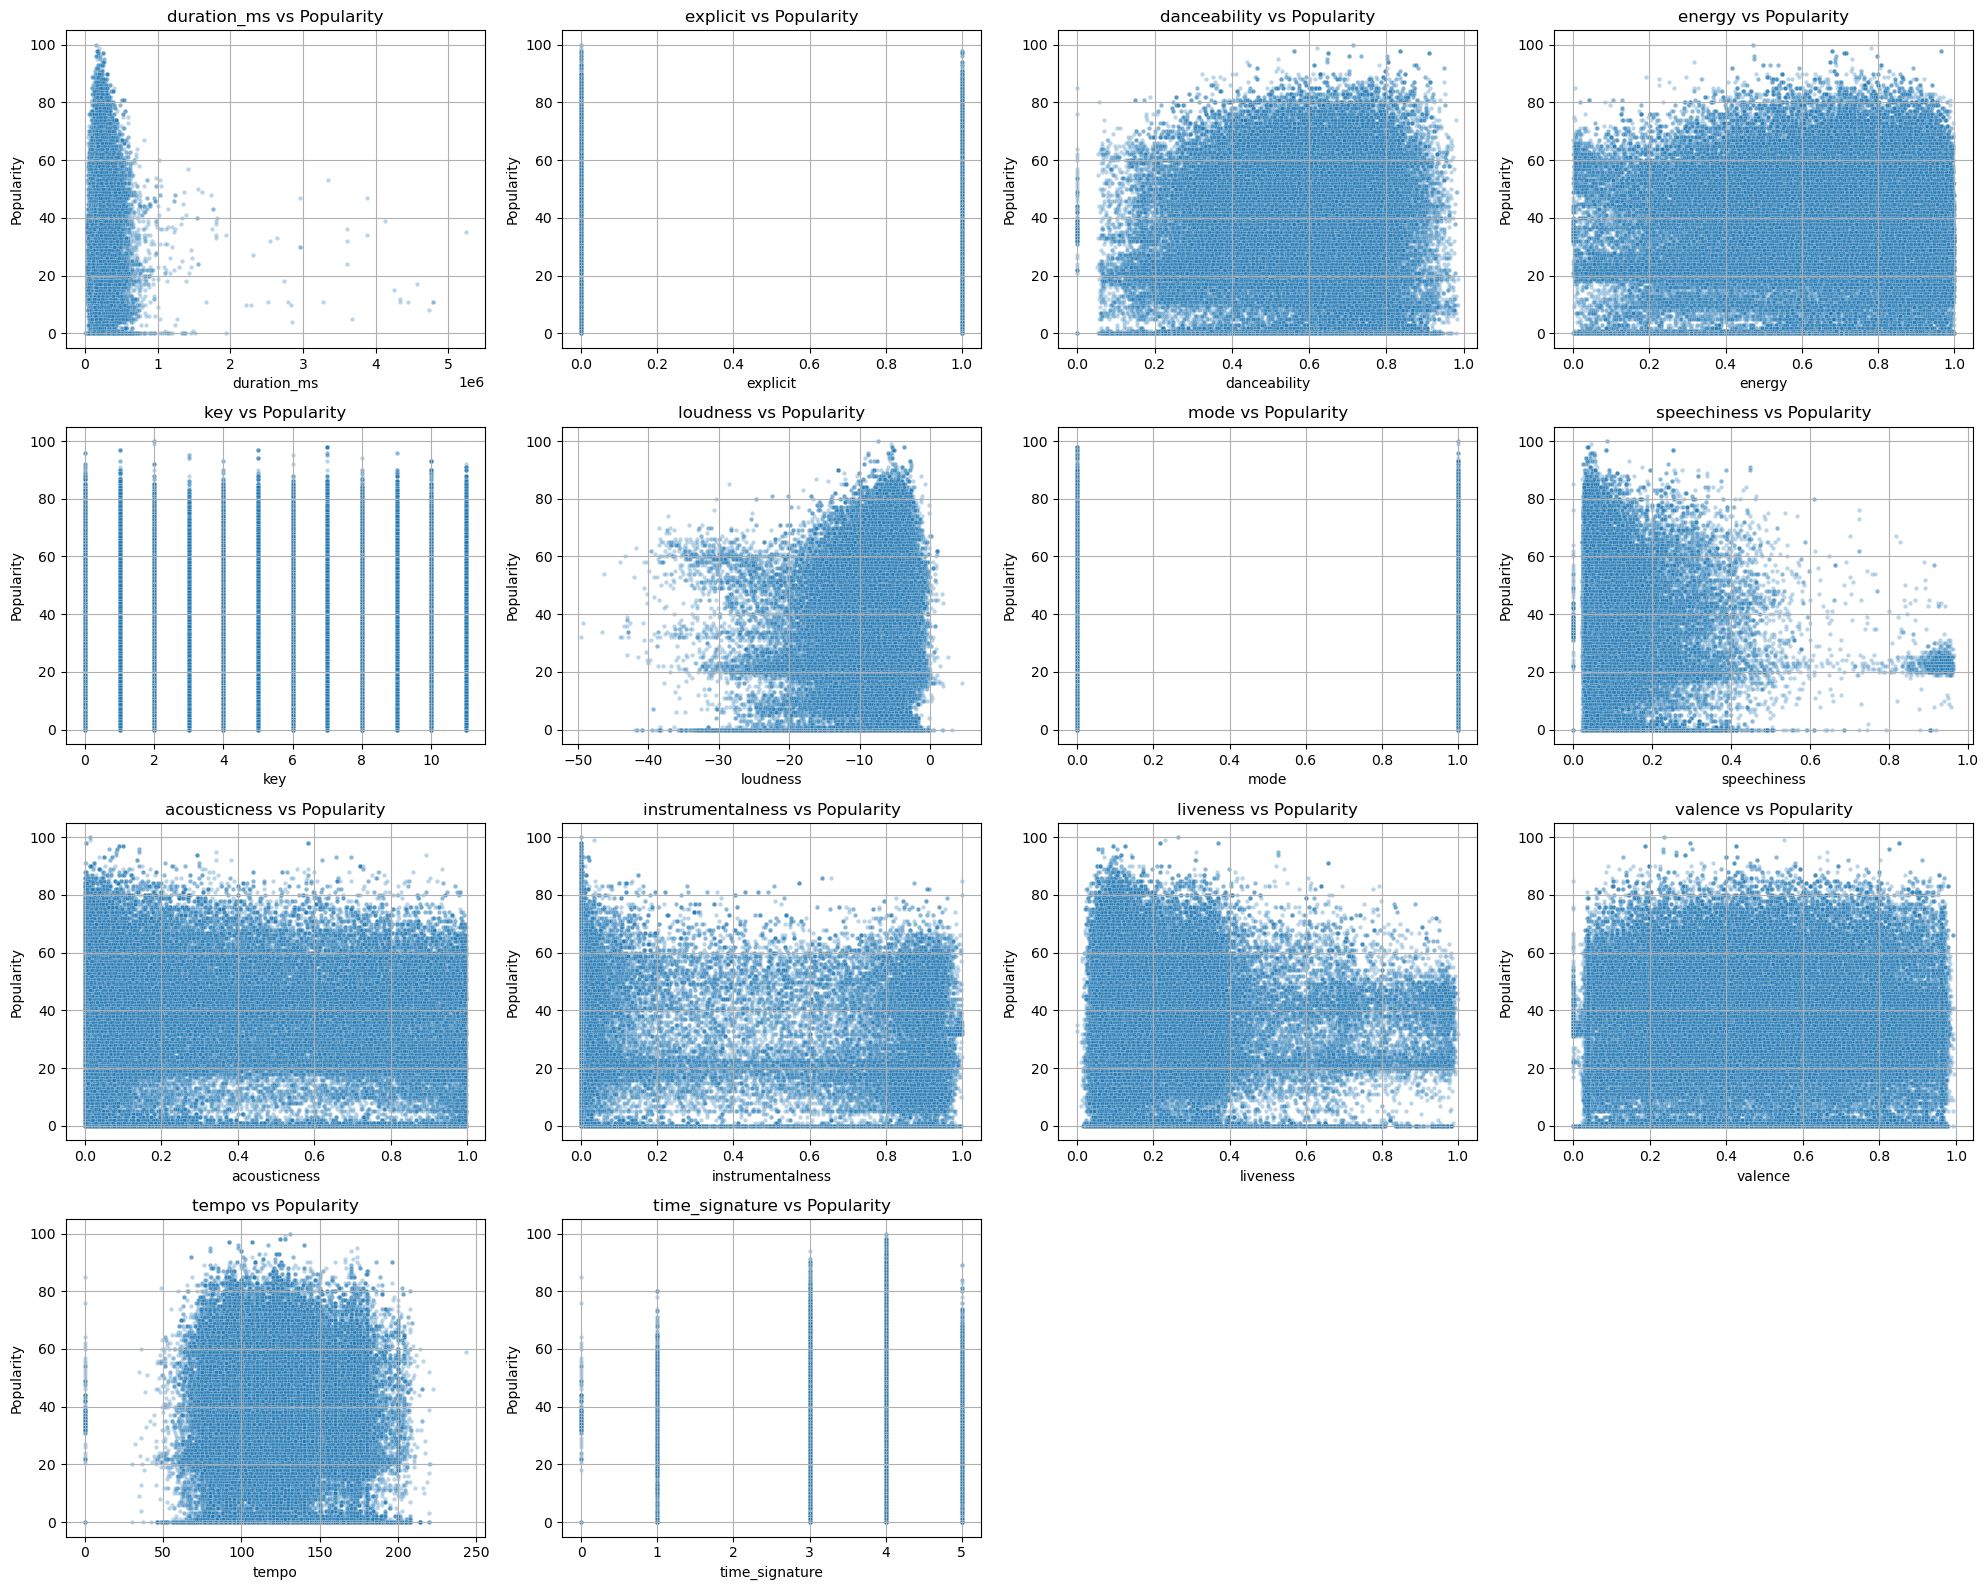

In [ ]:
# Plot scatter plots of feature vs popularity

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature'
]

# Calculate how many rows and columns you need for subplots
n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df[feature], y=df['popularity'], alpha=0.3, s=10)
    plt.title(f'{feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.grid(True)

plt.tight_layout()
plt.show()

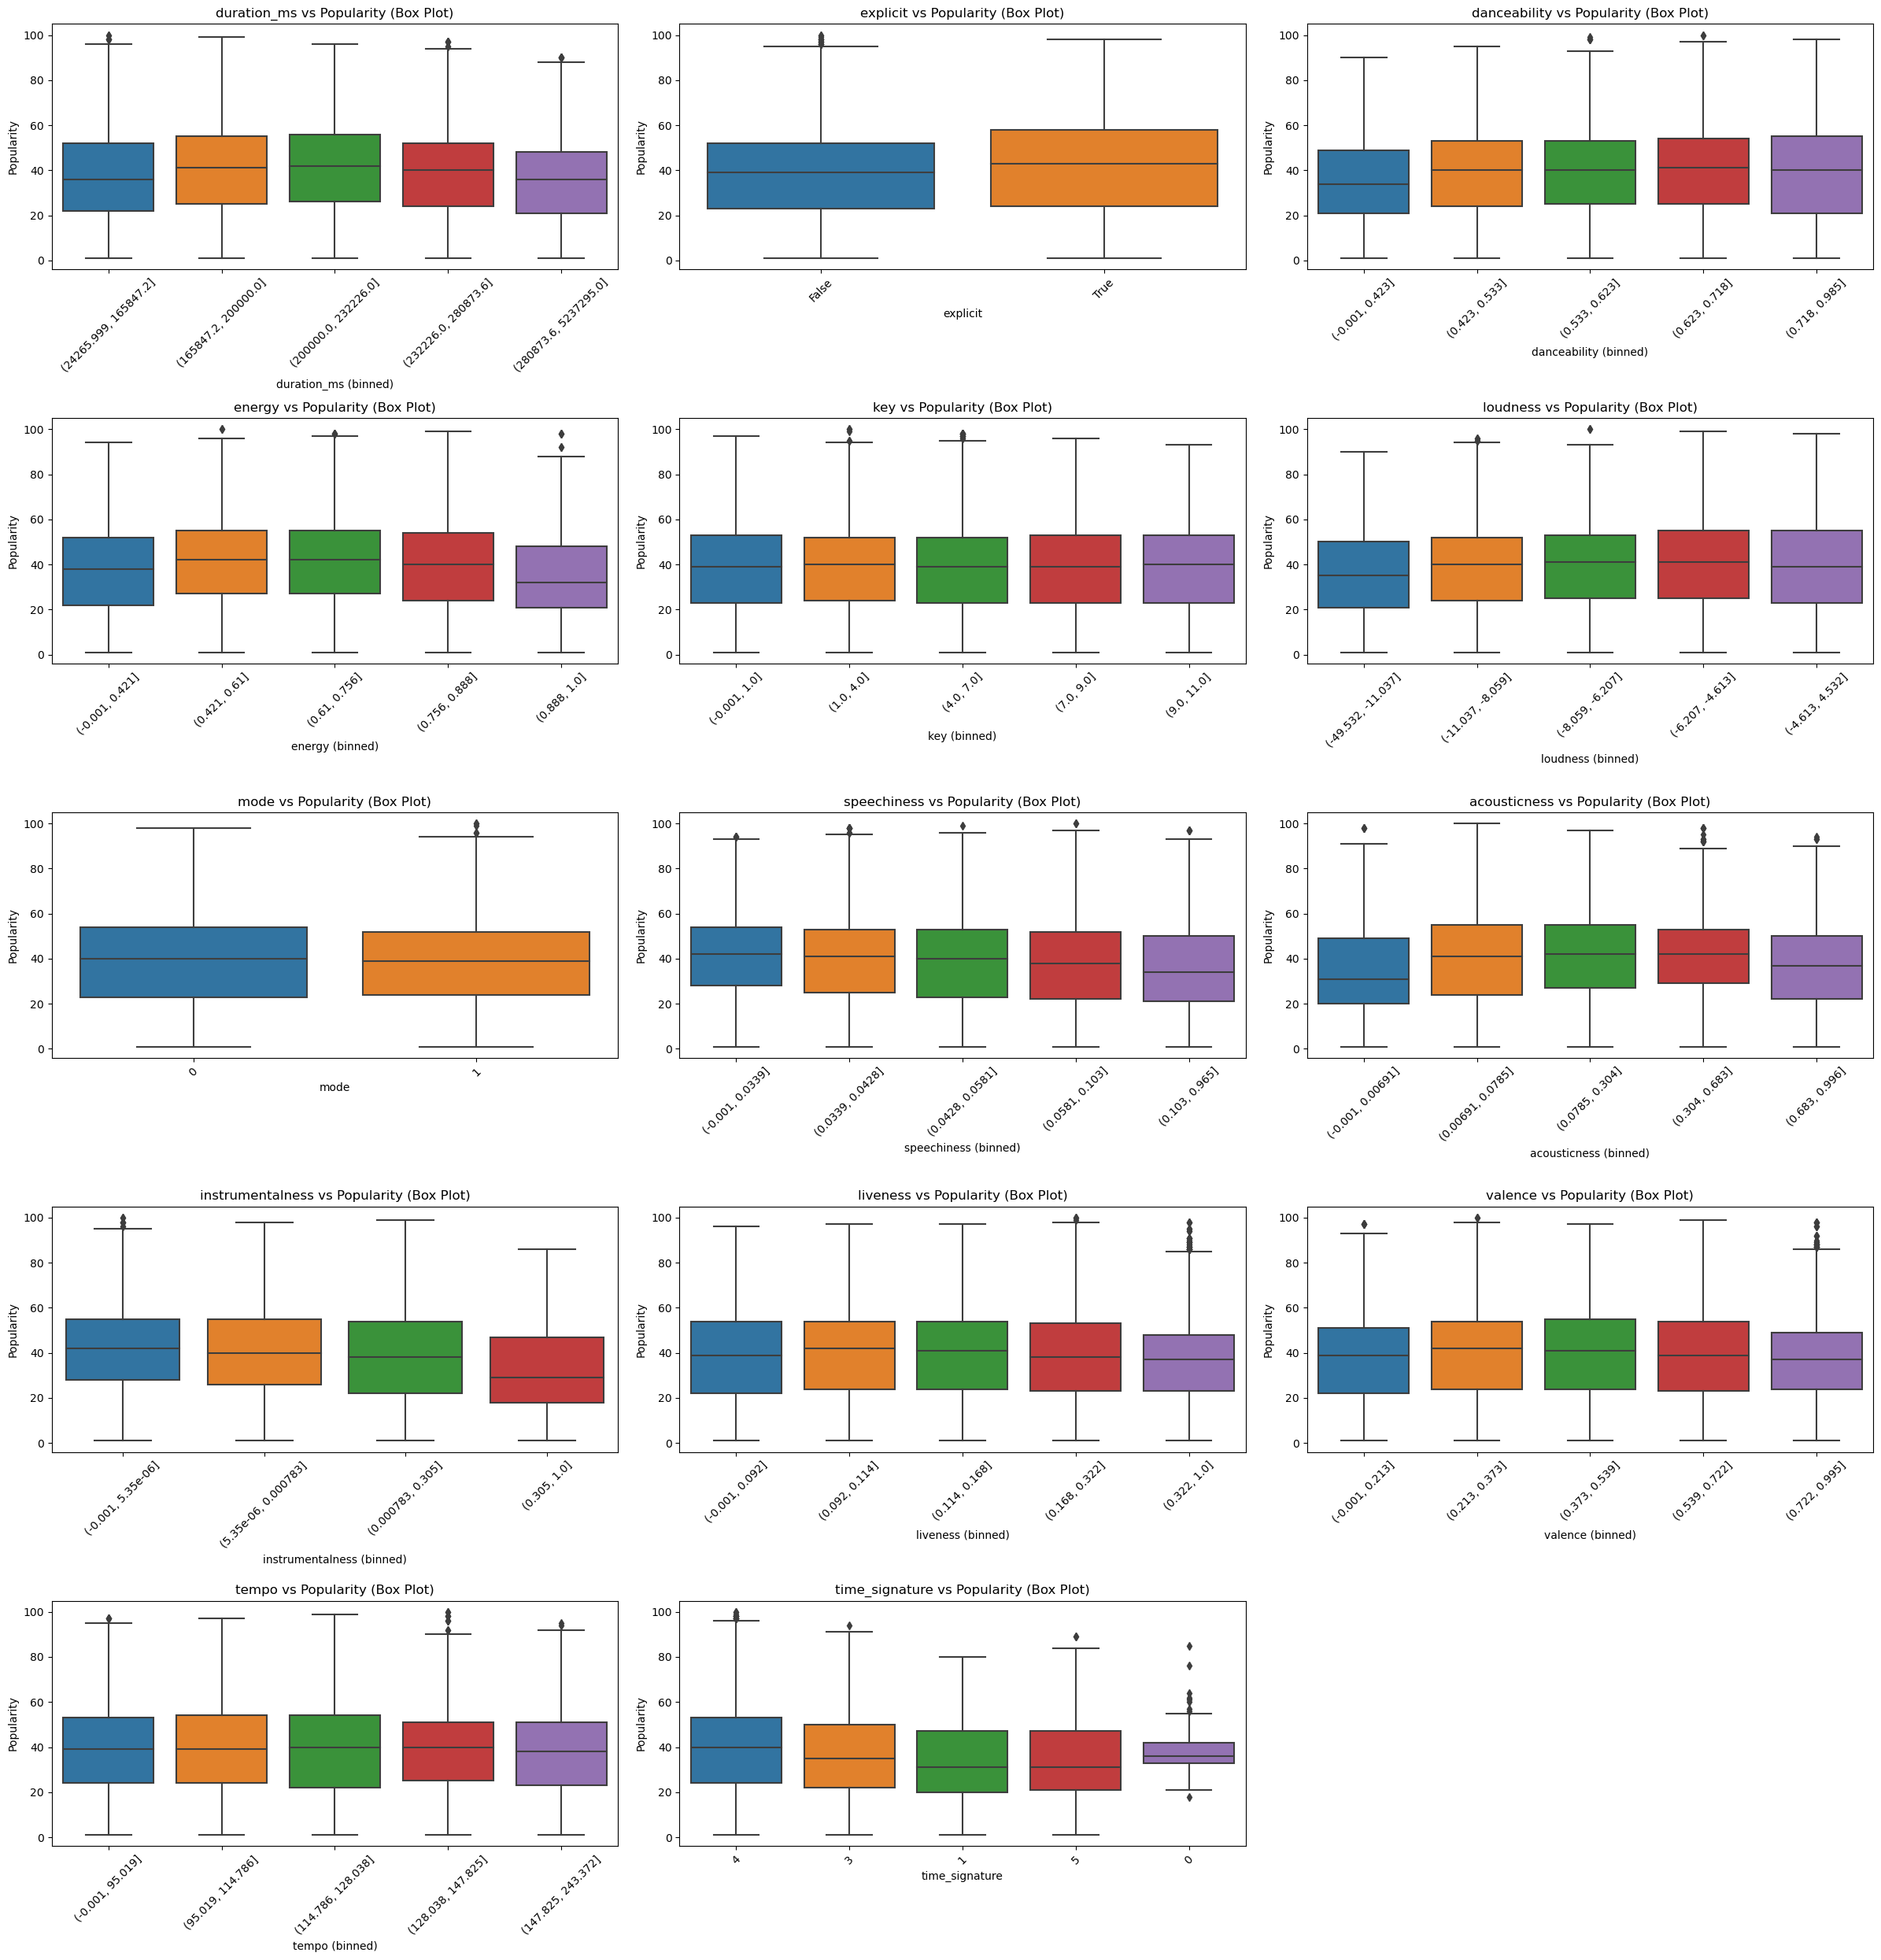

In [14]:
# DO NOT filter out zeros
# df = df[df['popularity'] > 0]  # <-- this line is now removed

# List of features to compare against popularity
features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature'
]

# Set up the subplot grid
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(24, n_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)

    if df[feature].nunique() > 10 and df[feature].dtype != 'object':
        # Bin continuous features with many unique values
        binned_feature = pd.qcut(df[feature], q=5, duplicates='drop')
        sns.boxplot(x=binned_feature, y=df['popularity'])
        plt.xlabel(f'{feature} (binned)')
    else:
        # Plot categorical or low-unique features
        sns.boxplot(x=df[feature].astype(str), y=df['popularity'])
        plt.xlabel(feature)

    plt.title(f'{feature} vs Popularity (Box Plot)')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


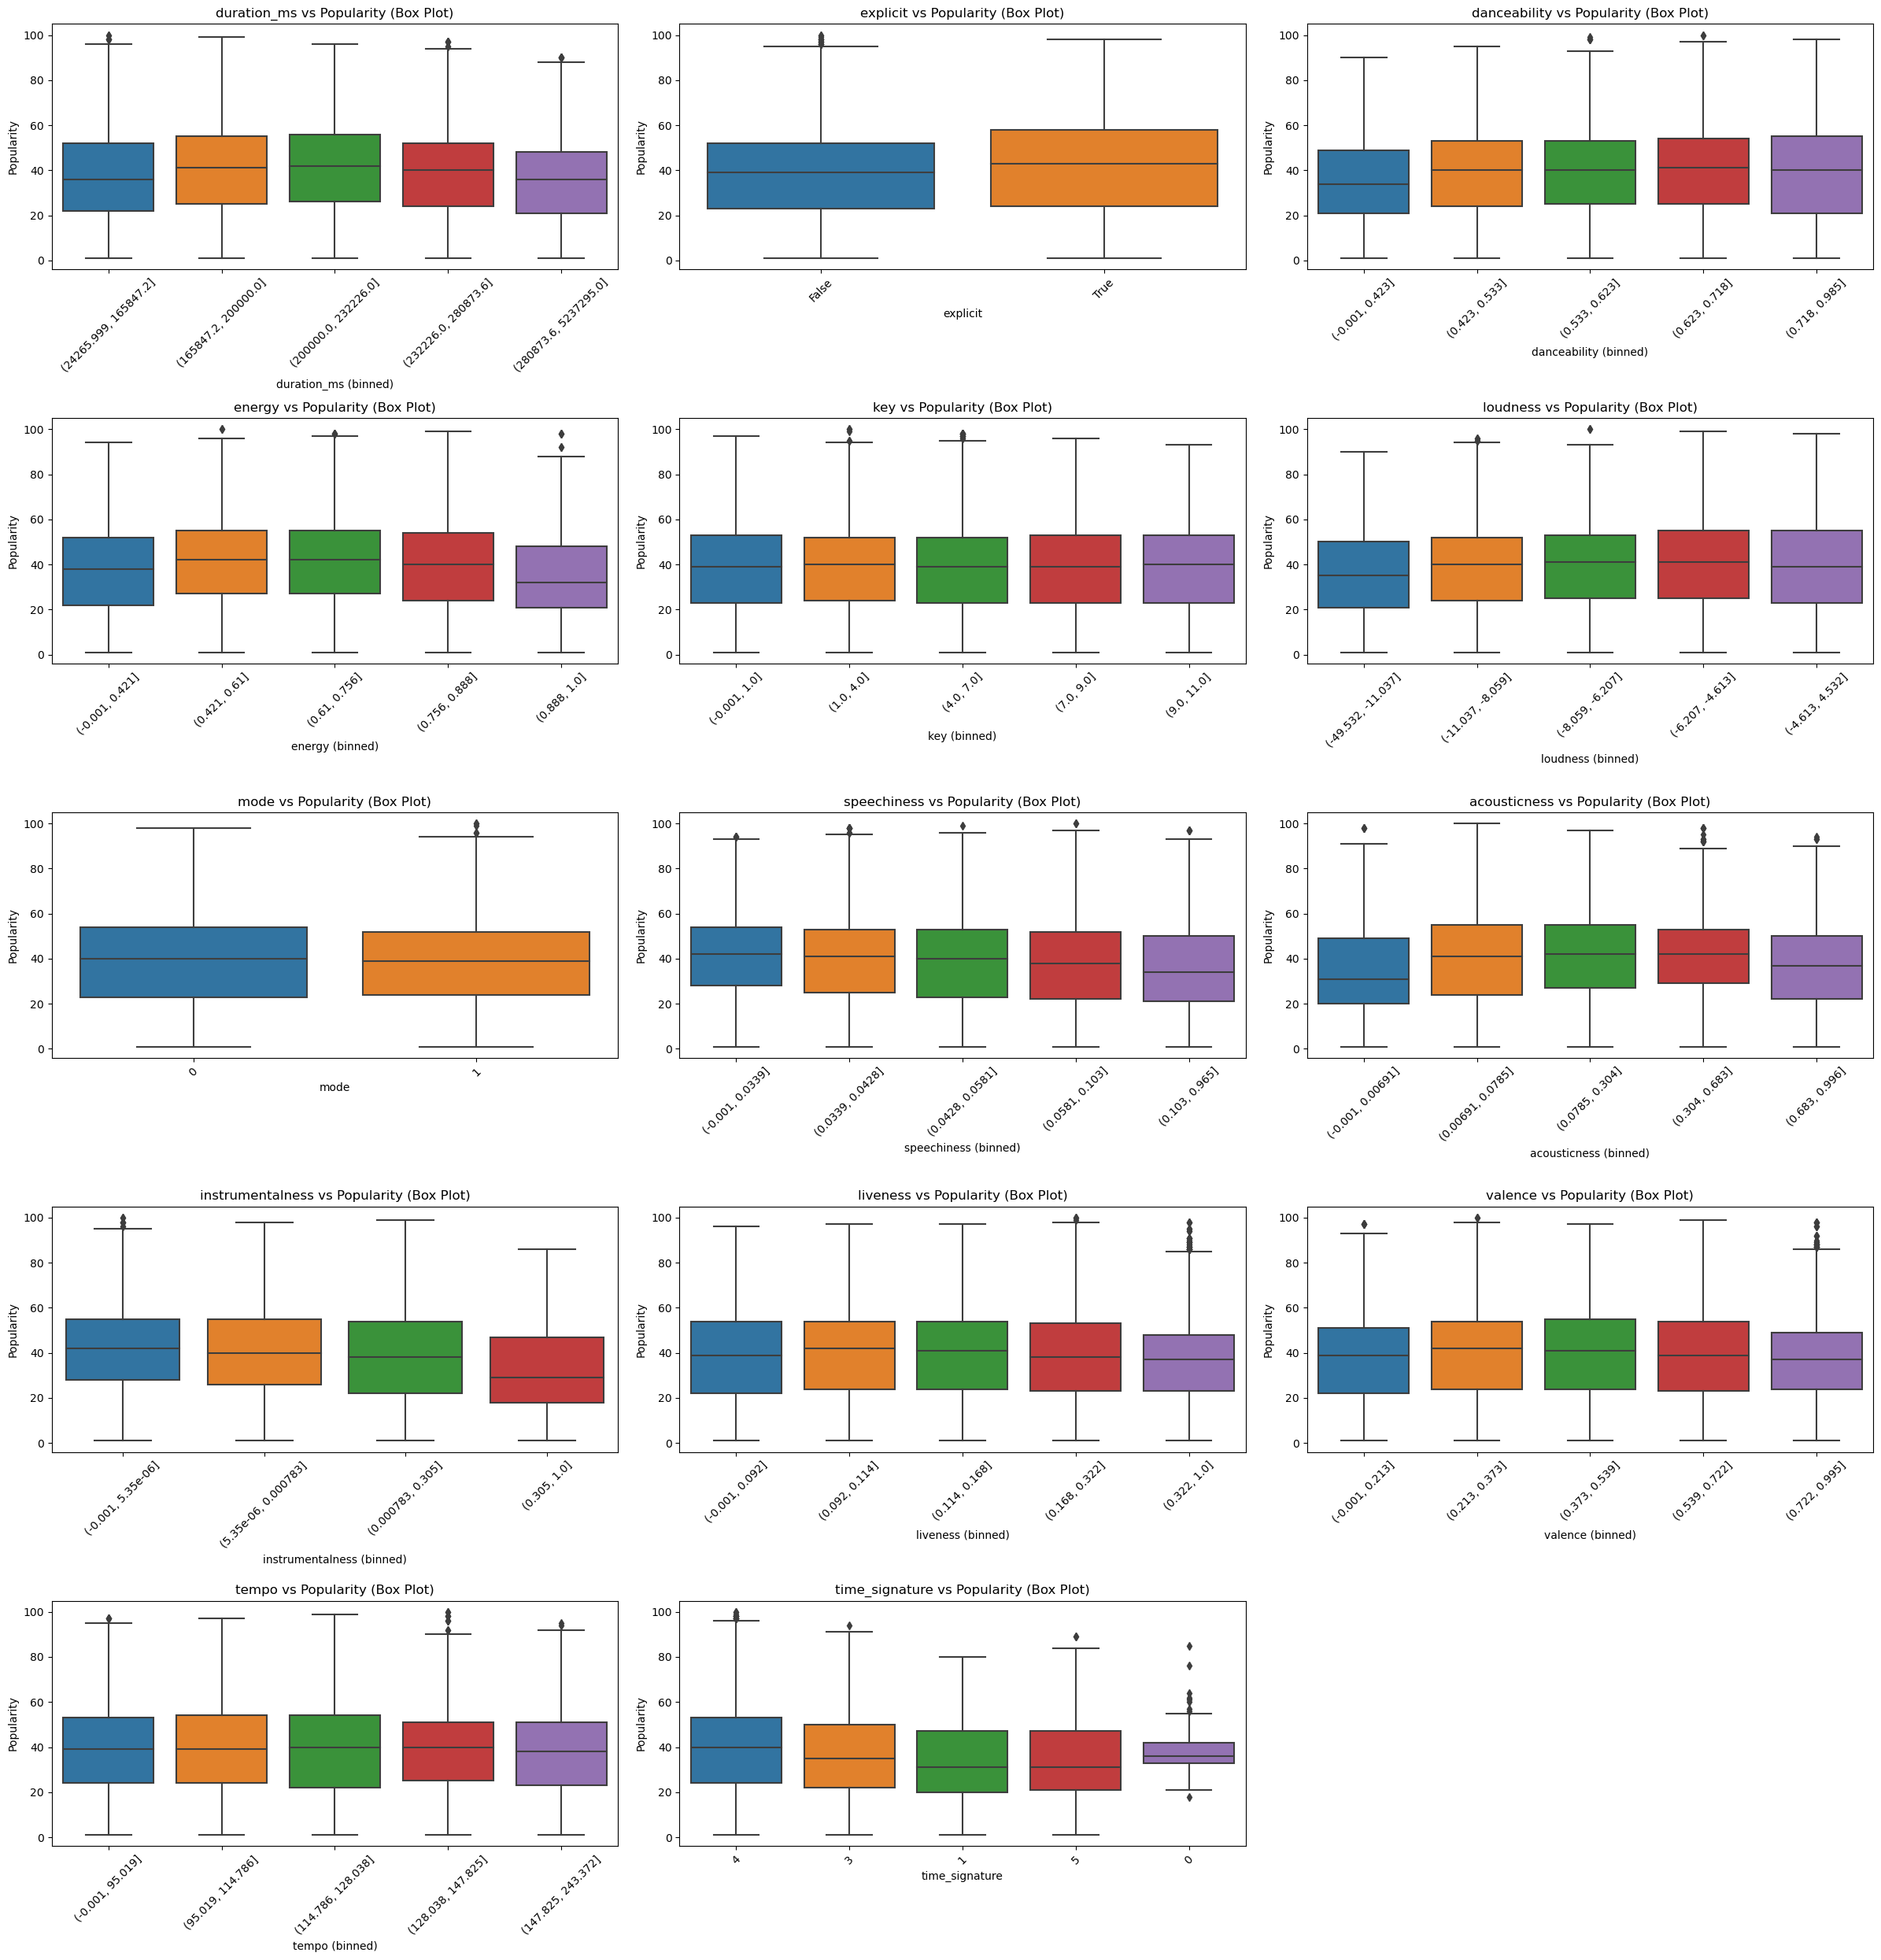

In [ ]:
# Box plots of feature vs popularity but doesn't use the features with a popularity score of zero

# Filter out songs with popularity = 0
df = df[df['popularity'] > 0]

# List of features to compare against popularity
features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature'
]

# Set up the subplot grid
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(24, n_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)

    if df[feature].nunique() > 10 and df[feature].dtype != 'object':
        # Bin continuous features with many unique values
        binned_feature = pd.qcut(df[feature], q=5, duplicates='drop')
        sns.boxplot(x=binned_feature, y=df['popularity'])
        plt.xlabel(f'{feature} (binned)')
    else:
        # Plot categorical or low-unique features
        sns.boxplot(x=df[feature].astype(str), y=df['popularity'])
        plt.xlabel(feature)

    plt.title(f'{feature} vs Popularity (Box Plot)')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()